In [2]:
#ORF 435, Final Project Nicholas Kim
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from scipy.optimize import linprog
#from cvxpy import *
from math import log
import matplotlib.pyplot as plt

In [6]:
#Problem 1
salary=250000
salary = salary * (1.022**(67-30))

def expectedSavings(lastSalary, lifeExpectancy, percentSpending):
    r = 1.032
    spending = percentSpending*lastSalary
    expectedSavings = 0
    for i in range(0,lifeExpectancy):
        val = spending/(r**(i+1))
        expectedSavings += val
        spending = spending * 1.022
    return expectedSavings
    
expectedSavings(salary, 17, 0.70)

5972470.470970963

In [33]:
#Problem 2
def p2f(x):
    if (type(x) == type("string")):
        if ('%' in x):
            return float(x.strip('%'))/100
        if (any(i.isdigit() for i in x)):
            return float(x)
    return x

dfFactors = pd.read_csv(r'C:\Users\Nick Kim\Documents\Nicholas Kim\School\School Semesters\Fall 2019 Semester\Risk Management\HW8\HW8_factors.csv')
dfAssets = pd.read_csv(r'C:\Users\Nick Kim\Documents\Nicholas Kim\School\School Semesters\Fall 2019 Semester\Risk Management\HW8\HW8_assets.csv')

dfFactorsNormal = dfFactors[dfFactors['Regime'] == 1]
dfFactorsCrash = dfFactors[dfFactors['Regime'] == -1]
dfAssetsNormal = dfAssets[dfAssets['Regime'] == 1]
dfAssetsCrash = dfAssets[dfAssets['Regime'] == -1]

In [34]:
dfNL = pd.read_csv(r'C:\Users\Nick Kim\Documents\Nicholas Kim\School\School Semesters\Fall 2019 Semester\Risk Management\HW8\HW8_normalLoadings.csv')
dfCL = pd.read_csv(r'C:\Users\Nick Kim\Documents\Nicholas Kim\School\School Semesters\Fall 2019 Semester\Risk Management\HW8\HW8_crashLoadings.csv')

In [35]:
dfNL.drop(['Unnamed: 7'], axis = 1, inplace = True)
dfNL.fillna(value = 0, inplace = True)
dfNL = dfNL.applymap(p2f)
dfNL['Expected Return'].iloc[0] = 1
dfCL.drop(['Unnamed: 7'], axis = 1, inplace = True)
dfCL.fillna(value = 0, inplace = True)
dfCL = dfCL.applymap(p2f)
dfCL['Expected Return'].iloc[0] = 1

In [36]:
assets = ['US Equities', 'US Treasuries', 'High Yield ', 'Corp Bonds', 'Real Estate','Commodities']

expectedAssetReturnsNormal = []
expectedAssetReturnsCrash = []
for asset in assets:
    expectedAssetReturnsNormal.append(np.dot(dfNL['Expected Return'], dfNL[asset]))
    expectedAssetReturnsCrash.append(np.dot(dfCL['Expected Return'], dfCL[asset]))

dfProblem2 = pd.DataFrame(columns = ['Regime'] + (assets))
dfProblem2.loc[0] = ["Normal"] + expectedAssetReturnsNormal
dfProblem2.loc[1] = ["Crash"] + expectedAssetReturnsCrash
print("Expected Asset Returns")
dfProblem2

Expected Asset Returns


,Regime,US Equities,US Treasuries,High Yield,Corp Bonds,Real Estate,Commodities
0,Normal,0.0112,0.003,0.008,0.0046,0.0084,0.0061
1,Crash,-0.0270,0.008,-0.016,0.0029,-0.0179,-0.0080


In [37]:
dfAssetsNormal.cov()

,US Equities,US Treasuries,High Yield,Corp Bonds,Real Estate,Commodities,Regime
US Equities,0.001279,0.000040,0.000340,0.000127,0.000729,0.000355,0.0
US Treasuries,0.000040,0.000166,0.000041,0.000157,0.000072,-0.000053,0.0
High Yield,0.000340,0.000041,0.000321,0.000134,0.000411,0.000153,0.0
Corp Bonds,0.000127,0.000157,0.000134,0.000210,0.000202,0.000008,0.0
Real Estate,0.000729,0.000072,0.000411,0.000202,0.001636,0.000111,0.0
Commodities,0.000355,-0.000053,0.000153,0.000008,0.000111,0.002799,0.0
Regime,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [38]:
dfAssetsCrash.cov()

,US Equities,US Treasuries,High Yield,Corp Bonds,Real Estate,Commodities,Regime
US Equities,0.004245,-0.000339,0.001721,0.000276,0.004916,0.001744,0.0
US Treasuries,-0.000339,0.000284,-0.000140,0.000197,-0.000205,-0.000250,0.0
High Yield,0.001721,-0.000140,0.001754,0.000466,0.002579,0.000905,0.0
Corp Bonds,0.000276,0.000197,0.000466,0.000470,0.000637,0.000317,0.0
Real Estate,0.004916,-0.000205,0.002579,0.000637,0.010590,0.002510,0.0
Commodities,0.001744,-0.000250,0.000905,0.000317,0.002510,0.007311,0.0
Regime,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [39]:
dfProblem2

,Regime,US Equities,US Treasuries,High Yield,Corp Bonds,Real Estate,Commodities
0,Normal,0.0112,0.003,0.008,0.0046,0.0084,0.0061
1,Crash,-0.0270,0.008,-0.016,0.0029,-0.0179,-0.0080


In [128]:
scenarioList = []
normalMeans = list(dfProblem2.iloc[0])[1:]
normalCov = dfAssetsNormal.drop(['Regime'], axis=1).cov().values
crashMeans = list(dfProblem2.iloc[1])[1:]
crashCov = dfAssetsCrash.drop(['Regime'], axis=1).cov().values

for scenario in range(10000):
    regimeIsNormal = True
    periodList = []
    for period in range(12*50):
        inflationVar = np.random.normal(1.022, 0.003)
        inflationVar = inflationVar**(1/12) - 1
        tempList = [inflationVar, inflationVar]
        if regimeIsNormal: #Normal
            periodList.append(list(np.random.multivariate_normal(normalMeans, normalCov))
                                   + tempList + [int(regimeIsNormal)])
        else: #Crash
            periodList.append(list(np.random.multivariate_normal(crashMeans, crashCov))
                                   + tempList + [regimeIsNormal - 1])     
        # Regime transition
        u = np.random.uniform()
        if regimeIsNormal:
            if (u > 0.98):
                regimeIsNormal = not regimeIsNormal
        else:
            if (u < 0.125):
                regimeIsNormal = not regimeIsNormal
    scenarioList.append(periodList)

#for data preservation of above
with open('scenarioSimulationData_HW8.csv', mode='w') as file:
    file.write("US Equity, US Treasuries, High Yield, Corp Bonds, Real Estate, Commodities, Inflation, Cash, Regime\n")
    for periodList in scenarioList:
        for period in periodList:
            for i in range(8):
                file.write(str(period[i]) + ",")
            file.write(str(period[8]) + "\n")

In [ ]:
########################################################################

In [3]:
#Load in scenario simulations
dfScenarios = pd.read_csv(r'C:\Users\Nick Kim\Documents\Nicholas Kim\School\School Semesters\Fall 2019 Semester\Risk Management\HW8\scenarioSImulationData_HW8.csv')

In [4]:
dfScenarios.head()
scenarioList = []
periodList = []
for i, row in enumerate(dfScenarios.values):
    periodList.append((list(row)[0:-1]))
    if ((i+1) % 600 == 0):
        scenarioList.append(periodList)
        periodList = []
    if (len(scenarioList) > 100):
        break

In [9]:
len(scenarioList)

101

In [175]:
#simulated wealth path results for policy rules a,b,c.

savingPercentage = 0.17
retirementSpending = 0.60

# last subarray is to store goals based on simulated salary
year_67 = [[],[],[],[]]
year_70 = [[],[],[],[]]

portfolioDistA = [0.0,0.60,0.30,0.0,0.0,0.0,0.0,0.10]
portfolioDistB = [0.60,0.40,0.0,0.0,0.0,0.0,0.0,0.0]
portfolioDistC = [0.75,0.15,0.0,0.0,0.0,0.0,0.0,0.10]

for index1, scenario in enumerate((scenarioList)):
    salary = 0
    wealthA = salary*savingPercentage
    wealthB = salary*savingPercentage
    wealthC = salary*savingPercentage
    assetValuesA = [wealthA*x for x in portfolioDistA]
    assetValuesB = [wealthB*x for x in portfolioDistB]
    assetValuesC = [wealthC*x for x in portfolioDistC]
    for index2, period in enumerate(scenario):
        for i in range(8):
            assetValuesA[i] *= 1+period[i]
            assetValuesB[i] *= 1+period[i]
            assetValuesC[i] *= 1+period[i]
        wealthA = np.sum(assetValuesA)
        wealthB = np.sum(assetValuesB)
        wealthC = np.sum(assetValuesC)
        if ((index2+1) % 12 == 0): # New year
            wealthA += salary*savingPercentage
            wealthB += salary*savingPercentage
            wealthC += salary*savingPercentage
            #Bogle balance
            age = 25 + int((index2+1)/12)
            xp = (100-age)/100.0
            portfolioDistC = [xp,0.90-xp,0.0,0.0,0.0,0.0,0.0,0.10]
        if (index2 == 59):
            salary = 250000
        if (index2 > 59):
            salary *= 1+period[7]

        for i in range(8):
            assetValuesA[i] = wealthA*portfolioDistA[i]
            assetValuesB[i] = wealthB*portfolioDistB[i]
            assetValuesC[i] = wealthC*portfolioDistC[i]
        if (index2 == 12*42-1): #67 years, life exp = 17
            year_67[0].append(np.sum(assetValuesA))
            year_67[1].append(np.sum(assetValuesB))
            year_67[2].append(np.sum(assetValuesC))
            year_67[3].append(expectedSavings(salary,17, retirementSpending))
        if (index2 == 12*45-1): #70 years, life exp = 15
            year_70[0].append(np.sum(assetValuesA))
            year_70[1].append(np.sum(assetValuesB))
            year_70[2].append(np.sum(assetValuesC))
            year_70[3].append(expectedSavings(salary,15, retirementSpending))
            
    if index1 > 100:
        break


In [176]:
def Prob_Goal(list1, goalList):
    counter = 0
    for i in range(len(list1)):
        if list1[i] >= goalList[i]:
            counter += 1
    return float(counter)/float(len(list1))

def GaR(list1, goalList):
    n = len(list1)
    goalDiffs = []
    for i in range(n):
        goalDiffs.append(max(goalList[i]-list1[i],0))
    goalDiffs.sort()
    i = (int(n*0.95) - 1)
    return goalDiffs[i]

In [177]:
horizonCols = ['Data Type', '67 years', '70 years']
df5a = pd.DataFrame(columns = horizonCols)
df5b = pd.DataFrame(columns = horizonCols)
df5c = pd.DataFrame(columns = horizonCols)
dfList = [df5a, df5b, df5c]

for i, dfTemp in enumerate(dfList):
    meanRow = ["Mean", np.mean(year_67[i]), np.mean(year_70[i])]
    varianceRow = ["Variance", np.var(year_67[i]), np.var(year_70[i])]
    GaRRow = ["GaR", GaR(year_67[i], year_67[3]), GaR(year_70[i], year_70[3])]
    ProbRow = ["Probability to hit Goal", Prob_Goal(year_67[i], year_67[3]), Prob_Goal(year_70[i], year_70[3])]
    dfTemp.loc[0] = meanRow
    dfTemp.loc[1] = varianceRow
    dfTemp.loc[2] = GaRRow
    dfTemp.loc[4] = ProbRow

In [178]:
df5a

,Data Type,67 years,70 years
0,Mean,5.548687e+06,6.712391e+06
1,Variance,9.274668e+11,1.580885e+12
2,GaR,9.402507e+05,0.000000e+00
4,Probability to hit Goal,6.732673e-01,9.405941e-01


In [179]:
df5b

,Data Type,67 years,70 years
0,Mean,7.537471e+06,9.513282e+06
1,Variance,1.083701e+13,2.048437e+13
2,GaR,1.606823e+06,8.929105e+05
4,Probability to hit Goal,7.326733e-01,8.514851e-01


In [180]:
df5c

,Data Type,67 years,70 years
0,Mean,6.637932e+06,8.125486e+06
1,Variance,4.591239e+12,7.286497e+12
2,GaR,1.253523e+06,2.466928e+05
4,Probability to hit Goal,7.524752e-01,8.811881e-01


In [183]:
sal2 = 0
discountRate = 1.032
presentValue = 0
for i in range(60):
    if (i <= 45):
        if (i == 5):
            sal2 = 250000/1.022
        sal2 *= 1.022
        presentValue += sal2*1/(discountRate**(i+1))
    if (i >= 46):
        presentValue += sal2*0.0/(discountRate**(i+1))
presentValue

7029884.531356411

In [79]:
sal2 = 0
savingsRate = 0.30
discountRate = 1.032
totalUtilityValue = 0
totalSavings = 0
for i in range(60):
    if (i <= 45):
        if (i == 5):
            sal2 = 250000/1.022
        sal2 *= 1.022
        if (sal2 != 0):
            totalUtilityValue += log(sal2*(1-savingsRate))
            totalSavings += sal2*savingsRate
    
retirementUtilityValue = 0
for i in range(14):
    retirementUtilityValue += log(totalSavings/14.0)

In [80]:
print(totalUtilityValue, retirementUtilityValue)
print(totalUtilityValue + retirementUtilityValue)

512.8186146299721 178.7508806104851
691.5694952404572


In [139]:
res = []
for n in range(10,40):
    sal2 = 0
    savingsRate = n*0.01
    discountRate = 1.032
    totalUtilityValue = 0
    totalSavings = 0
    for i in range(45):
        if (i == 5):
            sal2 = 250000/1.022
        sal2 *= 1.022
        if (sal2 != 0):
            totalUtilityValue += log(sal2*(1-savingsRate))*(2-i/45)
            totalSavings += sal2*savingsRate
            totalSavings *= 1

    retirementUtilityValue = 0
    for i in range(14):
        retirementUtilityValue += log(totalSavings/14.0)
    res.append(totalUtilityValue + retirementUtilityValue)

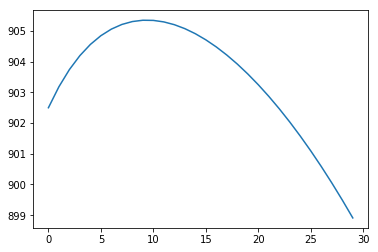

In [140]:
plt.plot(res)

In [111]:
res

[902.5014734880301,
 903.1852816149108,
 903.7455556757589,
 904.2007495152352,
 904.5651643544803,
 904.8500951290855,
 905.0646060020077,
 905.2160702509402,
 905.3105554981496,
 905.3531045383658,
 905.3479439398753,
 905.2986415853151,
 905.208227414495,
 905.0792871867075,
 904.9140361506489,
 904.7143775387092,
 904.4819494501836,
 904.218162744474,
 903.9242318964946,
 903.6012002855452,
 903.2499610383619,
 902.8712742884508,
 902.4657815207787,
 902.0340175252895,
 901.5764203717163,
 901.0933397327711,
 900.5850438164332,
 900.0517251160329,
 899.4935051456794,
 898.9104382956792]